- https://github.com/datadista/datasets/blob/master/COVID%2019/nota_nacional_covid_19_rango_edad.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
os.listdir('data')

['nacional_covid19_rango_edad.csv']

In [3]:
df_edad = pd.read_csv(os.path.join('data', 'nacional_covid19_rango_edad.csv'))
df_edad.fecha = pd.to_datetime(df_edad.fecha)

In [4]:
FTIME = '%Y-%m-%d'
reporte_fecha = 'Desde el %s hasta el %s' % (df_edad.fecha.min().strftime(FTIME), 
                                             df_edad.fecha.max().strftime(FTIME))
reporte_fecha

'Desde el 2020-03-23 hasta el 2020-04-05'

In [5]:
df_edad

fecha rango_edad     sexo  casos_confirmados  hospitalizados  \
0   2020-03-23        0-9    ambos                129              34   
1   2020-03-23      10-19    ambos                221              15   
2   2020-03-23      20-29    ambos               1285             183   
3   2020-03-23      30-39    ambos               2208             365   
4   2020-03-23      40-49    ambos               2919             663   
..         ...        ...      ...                ...             ...   
454 2020-04-05      60-69  hombres               8053            5351   
455 2020-04-05      70-79  hombres               8397            6612   
456 2020-04-05      80-89  hombres               5695            4397   
457 2020-04-05     90 y +  hombres               1368             885   
458 2020-04-05      Total  hombres              42972           25480   

     ingresos_uci  fallecidos  
0               1           0  
1               0           1  
2               8           4  
3              15           3  
4              40           9  
..            ...         ...  
454           774         402  
455           800        1301  
456            69        1659  
457             8         459  
458          2461        4008  

[459 rows x 7 columns]

In [6]:
df_edad.columns

Index(['fecha', 'rango_edad', 'sexo', 'casos_confirmados', 'hospitalizados',
       'ingresos_uci', 'fallecidos'],
      dtype='object')

In [7]:
float_cols = ['casos_confirmados', 'hospitalizados',
       'ingresos_uci', 'fallecidos']

In [8]:
LETALIDAD_ESTIMADA_SURCOREA = 1.2

sumario_edad = df_edad.groupby('rango_edad')[float_cols].sum()
sumario_edad['letalidad'] = (sumario_edad.fallecidos.div(sumario_edad.casos_confirmados)
                             .mul(100))
coeficiente_normalizador = sumario_edad.loc['Total', 'letalidad'] / LETALIDAD_ESTIMADA_SURCOREA
sumario_edad['letalidad_normalizada'] = sumario_edad.letalidad.div(coeficiente_normalizador)
sumario_edad

casos_confirmados  hospitalizados  ingresos_uci  fallecidos  \
rango_edad                                                                
0-9                      5718            1783           112          12   
10-19                    9864            1378            53          28   
20-29                   74598           11478           596         150   
30-39                  138553           27765          1643         328   
40-49                  206910           58557          4040         918   
50-59                  244868           90343          8228        2231   
60-69                  225969          121197         14640        6739   
70-79                  223048          152845         16220       20814   
80 y +                   6034            3442            71        1082   
80-89                  164816          108655          1916       33165   
90 y +                  51635           28180           145       12695   
Total                 1351256          605207         47609       78124   

            letalidad  letalidad_normalizada  
rango_edad                                    
0-9          0.209864               0.043558  
10-19        0.283861               0.058917  
20-29        0.201078               0.041735  
30-39        0.236733               0.049135  
40-49        0.443671               0.092086  
50-59        0.911103               0.189105  
60-69        2.982267               0.618986  
70-79        9.331624               1.936831  
80 y +      17.931720               3.721829  
80-89       20.122440               4.176525  
90 y +      24.586037               5.102969  
Total        5.781584               1.200000

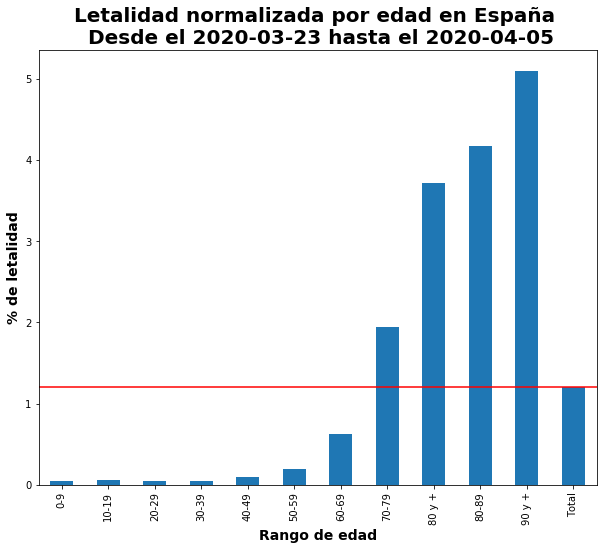

In [9]:
sumario_edad.letalidad_normalizada.plot.bar(figsize=(10, 8));
plt.axhline(sumario_edad.letalidad_normalizada.iloc[-1], c='r');
plt.title('Letalidad normalizada por edad en España \n %s' % reporte_fecha, fontweight='bold', fontsize=20)
plt.xlabel('Rango de edad', fontweight='bold', fontsize=14);
plt.ylabel('% de letalidad', fontweight='bold', fontsize=14);

In [10]:
sumario_edad

casos_confirmados  hospitalizados  ingresos_uci  fallecidos  \
rango_edad                                                                
0-9                      5718            1783           112          12   
10-19                    9864            1378            53          28   
20-29                   74598           11478           596         150   
30-39                  138553           27765          1643         328   
40-49                  206910           58557          4040         918   
50-59                  244868           90343          8228        2231   
60-69                  225969          121197         14640        6739   
70-79                  223048          152845         16220       20814   
80 y +                   6034            3442            71        1082   
80-89                  164816          108655          1916       33165   
90 y +                  51635           28180           145       12695   
Total                 1351256          605207         47609       78124   

            letalidad  letalidad_normalizada  
rango_edad                                    
0-9          0.209864               0.043558  
10-19        0.283861               0.058917  
20-29        0.201078               0.041735  
30-39        0.236733               0.049135  
40-49        0.443671               0.092086  
50-59        0.911103               0.189105  
60-69        2.982267               0.618986  
70-79        9.331624               1.936831  
80 y +      17.931720               3.721829  
80-89       20.122440               4.176525  
90 y +      24.586037               5.102969  
Total        5.781584               1.200000

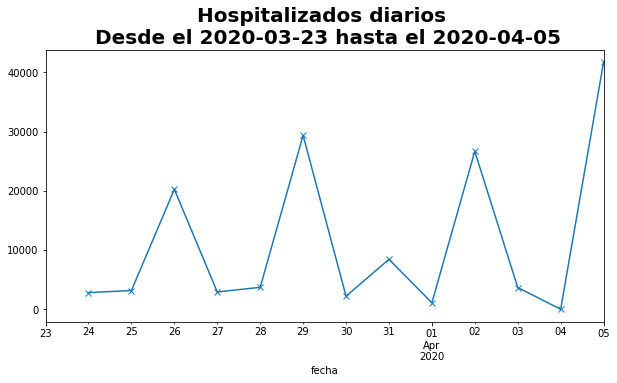

In [11]:
df_edad.groupby('fecha').hospitalizados.sum().diff().plot(style='x-', figsize=(10, 5));
plt.title('Hospitalizados diarios \n %s' % reporte_fecha, fontweight='bold', fontsize=20);

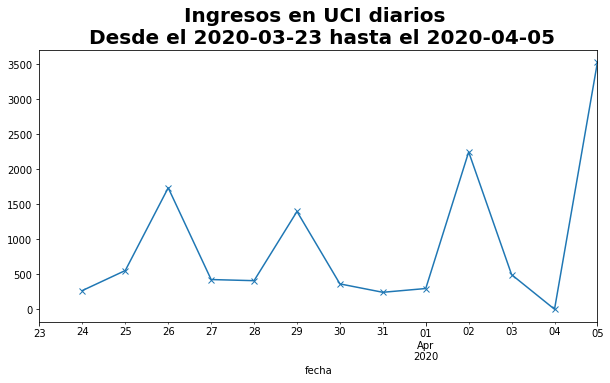

In [12]:
df_edad.groupby('fecha').ingresos_uci.sum().diff().plot(style='x-', figsize=(10, 5));
plt.title('Ingresos en UCI diarios \n %s' % reporte_fecha, fontweight='bold', fontsize=20);

In [20]:
last_date_df = df_edad.loc[df_edad.fecha.eq(df_edad.fecha.max()) & df_edad.sexo.eq('ambos')]
last_date_df

fecha rango_edad   sexo  casos_confirmados  hospitalizados  \
426 2020-04-05        0-9  ambos                286             107   
427 2020-04-05      10-19  ambos                486              99   
428 2020-04-05      20-29  ambos               4575             750   
429 2020-04-05      30-39  ambos               8663            1942   
430 2020-04-05      40-49  ambos              13300            4269   
431 2020-04-05      50-59  ambos              16455            6800   
432 2020-04-05      60-69  ambos              14847            8833   
433 2020-04-05      70-79  ambos              14217           10796   
434 2020-04-05      80-89  ambos              11119            7807   
435 2020-04-05     90 y +  ambos               3589            1968   
436 2020-04-05      Total  ambos              87537           43371   

     ingresos_uci  fallecidos  
426            15           2  
427             4           1  
428            43           9  
429           125          25  
430           326          65  
431           640         184  
432          1089         571  
433          1106        1808  
434           113        2690  
435            12         976  
436          3473        6331

In [21]:
LETALIDAD_ESTIMADA_SURCOREA = 1.2

sumario_edad = last_date_df.groupby('rango_edad')[float_cols].sum()
sumario_edad['letalidad'] = (sumario_edad.fallecidos.div(sumario_edad.casos_confirmados)
                             .mul(100))
coeficiente_normalizador = sumario_edad.loc['Total', 'letalidad'] / LETALIDAD_ESTIMADA_SURCOREA
sumario_edad['letalidad_normalizada'] = sumario_edad.letalidad.div(coeficiente_normalizador)
sumario_edad

casos_confirmados  hospitalizados  ingresos_uci  fallecidos  \
rango_edad                                                                
0-9                       286             107            15           2   
10-19                     486              99             4           1   
20-29                    4575             750            43           9   
30-39                    8663            1942           125          25   
40-49                   13300            4269           326          65   
50-59                   16455            6800           640         184   
60-69                   14847            8833          1089         571   
70-79                   14217           10796          1106        1808   
80-89                   11119            7807           113        2690   
90 y +                   3589            1968            12         976   
Total                   87537           43371          3473        6331   

            letalidad  letalidad_normalizada  
rango_edad                                    
0-9          0.699301               0.116028  
10-19        0.205761               0.034140  
20-29        0.196721               0.032640  
30-39        0.288584               0.047882  
40-49        0.488722               0.081089  
50-59        1.118201               0.185533  
60-69        3.845895               0.638114  
70-79       12.717170               2.110042  
80-89       24.192823               4.014090  
90 y +      27.194205               4.512082  
Total        7.232370               1.200000